**Project Purpose**

The goal of this project is to create a Convolutional Neural Network (CNN) that automatically detects whether a person is wearing a mask in images. The CNN classifies images as either 'with mask' or 'without mask,' and it has a high test accuracy of 95.04%. This accuracy helps to effectively monitor mask usage and supports public health by making sure people follow mask-wearing rules.

In [4]:
pip install opencv-python==4.5.3.56

  Using cached opencv-python-4.5.3.56.tar.gz (89.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [248 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "linux" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
        Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
        Using cache

# Import Libraries

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image,ImageFilter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout


In [2]:
data_with_mask_files = os.listdir(r"C:\\Users\\kch\\Documents\\data\\with_mask")
data_without_mask_files = os.listdir(r"C:\\Users\\kch\\Documents\\data\\without_mask")

In [3]:
data_with_mask_files

['with_mask_1.jpg',
 'with_mask_10.jpg',
 'with_mask_100.jpg',
 'with_mask_1000.jpg',
 'with_mask_1001.jpg',
 'with_mask_1002.jpg',
 'with_mask_1003.jpg',
 'with_mask_1004.jpg',
 'with_mask_1005.jpg',
 'with_mask_1006.jpg',
 'with_mask_1007.jpg',
 'with_mask_1008.jpg',
 'with_mask_1009.jpg',
 'with_mask_101.jpg',
 'with_mask_1010.jpg',
 'with_mask_1011.jpg',
 'with_mask_1012.jpg',
 'with_mask_1013.jpg',
 'with_mask_1014.jpg',
 'with_mask_1015.jpg',
 'with_mask_1016.jpg',
 'with_mask_1017.jpg',
 'with_mask_1018.jpg',
 'with_mask_1019.jpg',
 'with_mask_102.jpg',
 'with_mask_1020.jpg',
 'with_mask_1021.jpg',
 'with_mask_1022.jpg',
 'with_mask_1023.jpg',
 'with_mask_1024.jpg',
 'with_mask_1025.jpg',
 'with_mask_1026.jpg',
 'with_mask_1027.jpg',
 'with_mask_1028.jpg',
 'with_mask_1029.jpg',
 'with_mask_103.jpg',
 'with_mask_1030.jpg',
 'with_mask_1031.jpg',
 'with_mask_1032.jpg',
 'with_mask_1033.jpg',
 'with_mask_1034.jpg',
 'with_mask_1035.jpg',
 'with_mask_1036.jpg',
 'with_mask_1037.jpg

In [4]:
data_with_mask = (data_with_mask_files[:5])
data_without_mask= (data_without_mask_files[:5])

In [5]:
len(data_with_mask)

5

In [6]:
img_data=[]
for img in data_with_mask:
    img_arr = cv2.imread(os.path.join(r"C:\\Users\\kch\\Documents\\data\\with_mask",img))
    img_data.append(img_arr )

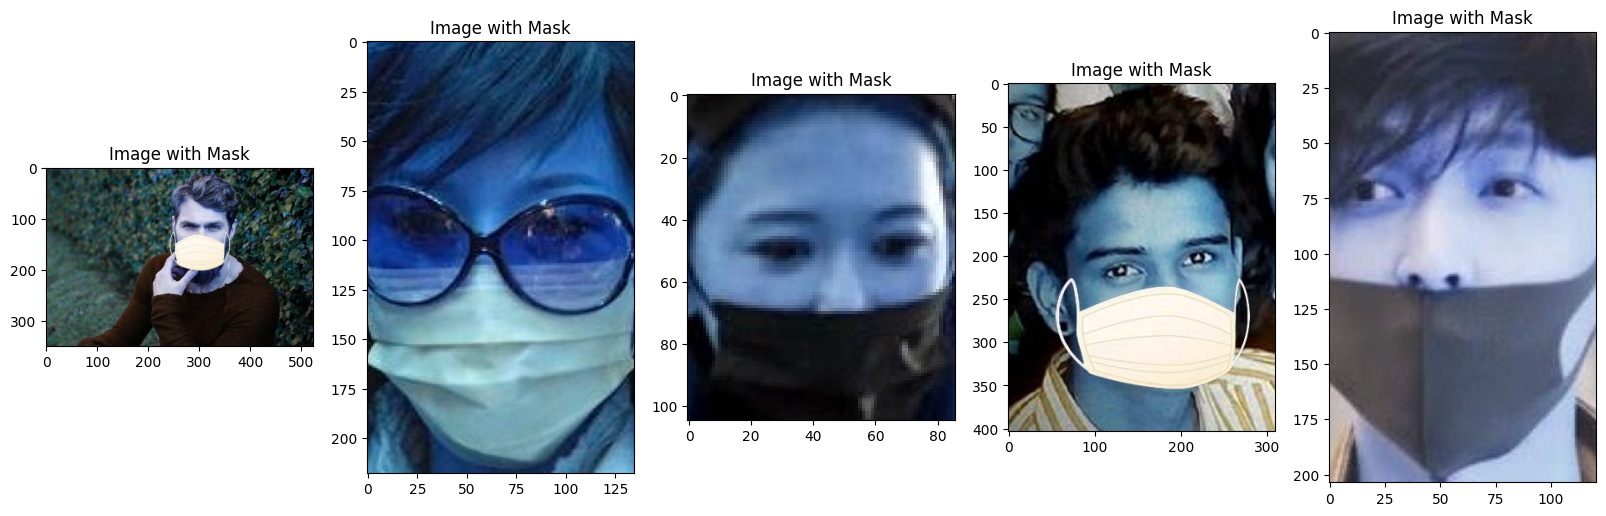

In [7]:
plt.figure(figsize=(20, 10))
for i in range(len(img_data)):
    plt.subplot(1,5 , i + 1)
    plt.imshow(img_data[i])
    plt.title('Image with Mask')
    plt.axis()

plt.show()

   

In [8]:
data_img=[]
for img in data_without_mask:
    img_arr = cv2.imread(os.path.join(r"C:\\Users\\kch\\Documents\\data\\without_mask",img))
    data_img.append(img_arr)

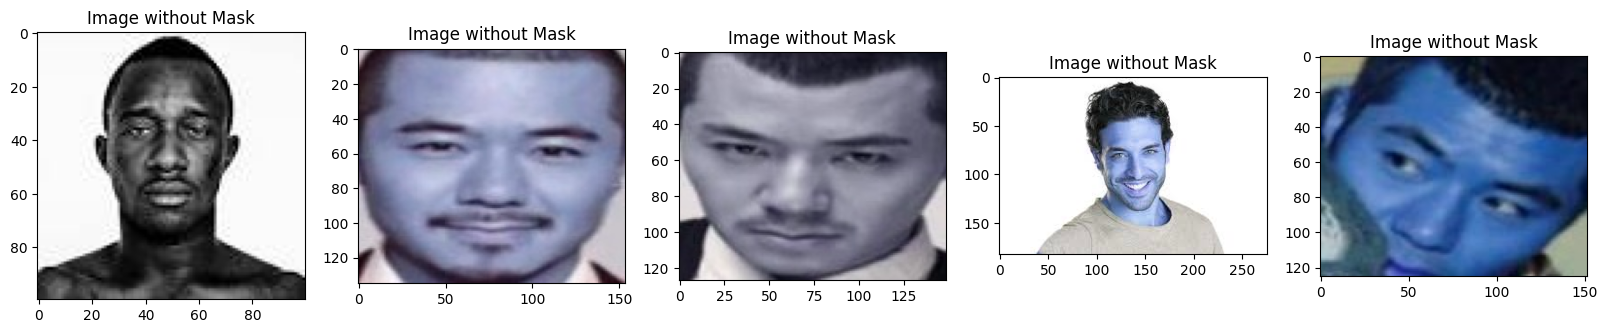

In [9]:
plt.figure(figsize=(20, 10))
for i in range(len(data_img)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data_img[i])
    plt.title('Image without Mask')
    plt.axis()

plt.show()

In [10]:
with_mask_labels = [1]*len(data_with_mask_files)
print(f"With mask lables",with_mask_labels[0:10])
without_mask_labels = [0]*len(data_without_mask_files)
print(f"Without mask lables",without_mask_labels[0:10])


With mask lables [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Without mask lables [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
Lables = with_mask_labels + without_mask_labels
print(f"Lables of with mask",Lables[0:10])
print(f"Lables of without mask",Lables[-10:])

Lables of with mask [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Lables of without mask [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
with_mask_path = r"C:\\Users\\kch\\Documents\\data\\with_mask"

data=[]
for img_file in data_with_mask_files:
    img_path = os.path.join(with_mask_path , img_file)
    image = Image.open(img_path)
    image = image.resize((128,128))
    image = image.convert("RGB")
    data.append(image)

C:\Users\kch\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


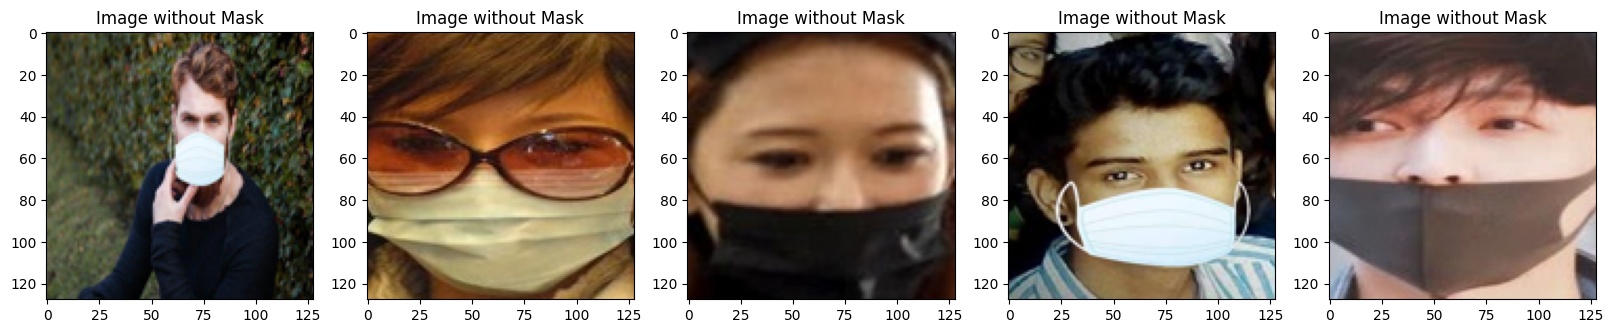

In [13]:
plt.figure(figsize=(20, 10))
for i in range(min(5, len(data))):
    plt.subplot(1, 5,  i + 1)
    plt.imshow(data[i])
    plt.title('Image without Mask')


plt.show()

In [14]:
without_mask_labels = r"C:\\Users\\kch\\Documents\\data\\without_mask"

data=[]
for img_file in data_without_mask_files:
    img_path = os.path.join(without_mask_labels,img_file)
    image = Image.open(img_path)
    image = image.resize((128,128))
    image = image.convert("RGB")
    data.append(image)

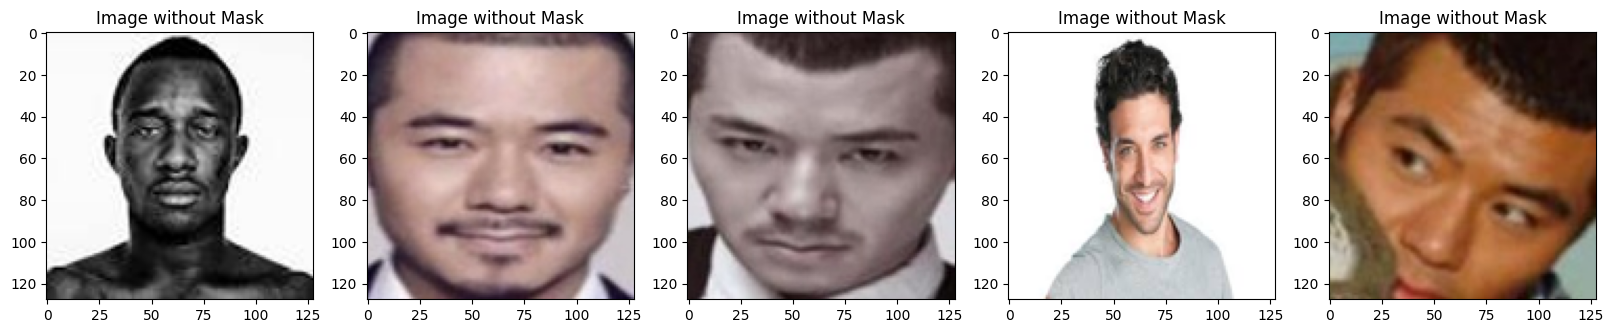

In [15]:
plt.figure(figsize= (20,10))
for i in range(min(5,len(data))):
    plt.subplot(1, 5, i+1)
    plt.imshow(data[i])
    plt.title('Image without Mask')


plt.show()
    

# converting image list and label list to numpy arrays :

In [16]:
with_mask_path = r"C:\\Users\\kch\\Documents\\data\\with_mask"

data=[]
for img_file in data_with_mask_files:
    img_path = os.path.join(with_mask_path , img_file)
    image = Image.open(img_path)
    image = image.resize((128,128))
    image = image.convert("RGB")
    data.append(image)
    
    
    
without_mask_labels = r"C:\\Users\\kch\\Documents\\data\\without_mask"

for img_file in data_without_mask_files:
    img_path = os.path.join(without_mask_labels,img_file)
    image = Image.open(img_path)
    image = image.resize((128,128))
    image = image.convert("RGB")
    data.append(image)

In [17]:
X = np.array(data)
Y = np.array(Lables)

In [18]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (6042, 128, 128, 3)
Shape of Y_train is: (6042,)

Shape of X_test is: (1511, 128, 128, 3)
Shape of Y_test is: (1511,)


In [21]:
#scaling the data
X_train_scale = X_train/255
X_test_scale = X_test/255

In [22]:
num_of_classes =2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation ='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation= 'relu'))
model.add(keras.layers.Dense(64,activation = 'relu'))

model.add(keras.layers.Dense(128,activation= 'relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(64,activation= 'relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))


# Compile the neural network :

In [23]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['acc'])

In [24]:
history = model.fit(X_train_scale, Y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10


152/152 [==============================] - 73s 392ms/step - loss: 0.3909 - acc: 0.8283 - val_loss: 0.2861 - val_acc: 0.8809
Epoch 2/10
152/152 [==============================] - 55s 360ms/step - loss: 0.2387 - acc: 0.9017 - val_loss: 0.2827 - val_acc: 0.9032
Epoch 3/10
152/152 [==============================] - 55s 361ms/step - loss: 0.1781 - acc: 0.9282 - val_loss: 0.2140 - val_acc: 0.9272
Epoch 4/10
152/152 [==============================] - 56s 367ms/step - loss: 0.1329 - acc: 0.9481 - val_loss: 0.2089 - val_acc: 0.9222
Epoch 5/10
152/152 [==============================] - 62s 405ms/step - loss: 0.1013 - acc: 0.9628 - val_loss: 0.2361 - val_acc: 0.9355
Epoch 6/10
152/152 [==============================] - 54s 356ms/step - loss: 0.0692 - acc: 0.9781 - val_loss: 0.2452 - val_acc: 0.9338
Epoch 7/10
152/152 [==============================] - 53s 351ms/step - loss: 0.0538 - acc: 0.9818 - val_loss: 0.2510 - val_acc: 0.9380
Epoch 8/10
152/152 [==============================] -

# Model Evaluation :

In [25]:
loss,accuracy = model.evaluate(X_test_scale , Y_test)
print('Test Accuracy =', accuracy)
print('Test loss =', loss)

48/48 [==============================] - 3s 65ms/step - loss: 0.1927 - acc: 0.9504
Test Accuracy = 0.9503639936447144
Test loss = 0.1926754266023636


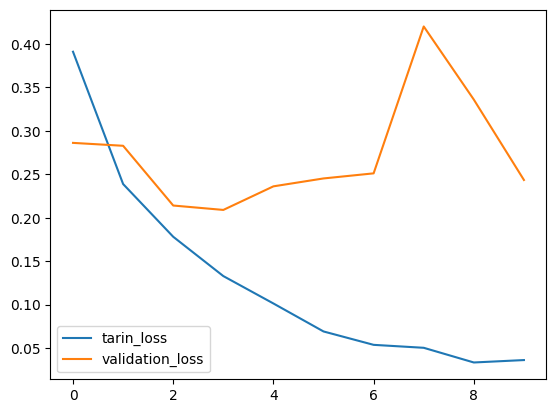

In [26]:
h = history

plt.plot(h.history['loss'],label = 'tarin_loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

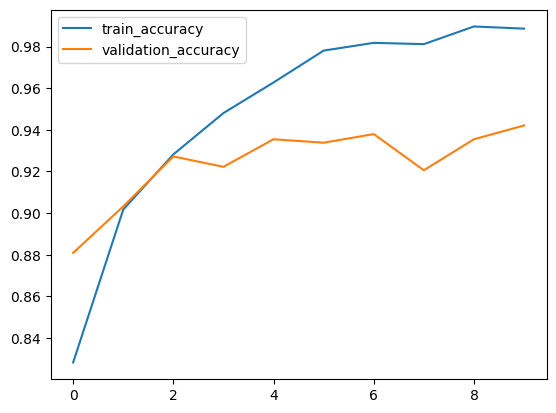

In [27]:
plt.plot(h.history['acc'], label = 'train_accuracy')
plt.plot(h.history['val_acc'], label = 'validation_accuracy')
plt.legend()
plt.show()

# Classification Report

In [28]:
y_pred = model.predict(X_test_scale )
y_pred = np.argmax(y_pred, axis= 1)

print(classification_report(Y_test,y_pred))

48/48 [==============================] - 4s 73ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       768
           1       0.96      0.94      0.95       743

    accuracy                           0.95      1511
   macro avg       0.95      0.95      0.95      1511
weighted avg       0.95      0.95      0.95      1511



1/1 [==============================] - 0s 31ms/step
[[0.29388252 0.97443455]]
1
The person in the image is wearing a mask


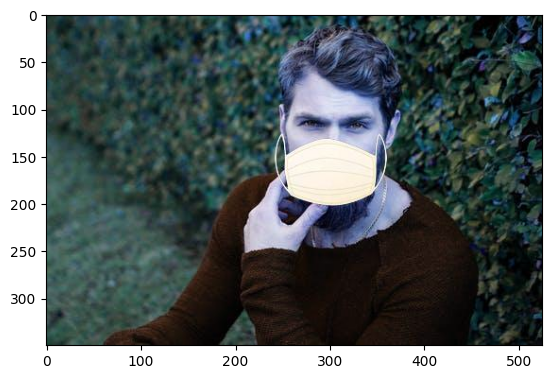

In [29]:
input_image_path =r"C:\\Users\\kch\\Documents\\data\\with_mask\\with_mask_1.jpg"

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

    print('The person in the image is wearing a mask')

else:

    print('The person in the image is not wearing a mask')

1/1 [==============================] - 0s 50ms/step
[[0.5004948  0.79908526]]
1
The person in the image is wearing a mask


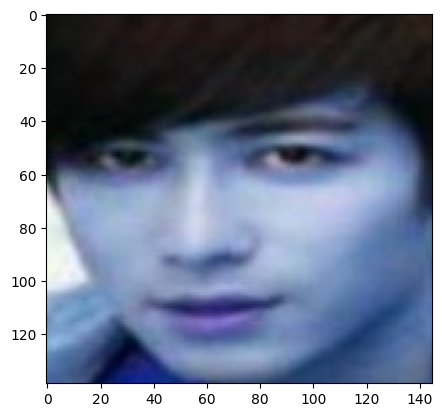

In [30]:
input_image_path =r"C:\\Users\\kch\\Documents\\data\\without_mask\\without_mask_102.jpg"

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')